In [3]:
!pip install -q yfinance

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [8]:
from pandas_datareader.data import DataReader
import yfinance as yf
from datetime import datetime

In [10]:
tech_list = ['AAPL', 'GOOG' , 'MSFT', 'AMZN']
tech_list = ['AAPL', 'GOOG' , 'MSFT', 'AMZN']
end=datetime.now()
start=datetime(end.year -1, end.month, end.day)
for stock in tech_list:
    globals()[stock] = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
company_list=[AAPL,GOOG,MSFT,AMZN]
company_name=["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df=pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-03-03,3070.629883,3078.580078,2937.120117,2957.969971,2957.969971,3259900,AMAZON
2022-03-04,2943.179932,2957.000000,2876.139893,2912.820068,2912.820068,3046700,AMAZON
2022-03-07,2908.870117,2921.889893,2748.330078,2749.060059,2749.060059,4346700,AMAZON
2022-03-08,2733.669922,2813.989990,2671.449951,2720.290039,2720.290039,4583100,AMAZON
2022-03-09,2790.000000,2805.000000,2736.560059,2785.580078,2785.580078,4132800,AMAZON
2022-03-10,2913.699951,2973.489990,2879.560059,2936.350098,2936.350098,6753100,AMAZON
2022-03-11,2991.489990,2993.500000,2907.379883,2910.489990,2910.489990,3440500,AMAZON
2022-03-14,2919.620117,2949.000000,2817.679932,2837.060059,2837.060059,3704300,AMAZON
2022-03-15,2857.000000,2959.699951,2840.000000,2947.330078,2947.330078,3779200,AMAZON


In [12]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,148.289292,149.896496,146.843110,148.436969,148.031681,8.770620e+07
std,16.680741,17.013758,16.268277,16.640611,16.825806,2.629449e+07
min,119.540001,120.400002,118.860001,119.900002,119.191582,4.100000e+07
25%,133.782505,135.000000,132.839996,133.769997,133.193687,6.904782e+07
50%,148.185005,149.144997,146.440002,148.019997,147.723854,8.360580e+07
75%,161.389996,164.109997,159.054996,161.567497,161.361908,1.006398e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,1.954327e+08


In [13]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-03-16 to 2022-03-16
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          254 non-null    float64
 1   High          254 non-null    float64
 2   Low           254 non-null    float64
 3   Close         254 non-null    float64
 4   Adj Close     254 non-null    float64
 5   Volume        254 non-null    int64  
 6   company_name  254 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


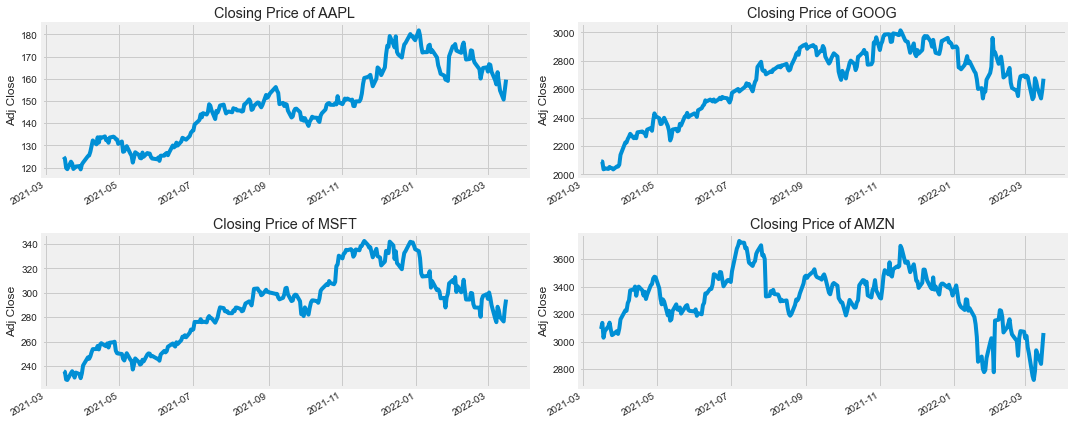

In [16]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i-1]}")

plt.tight_layout()

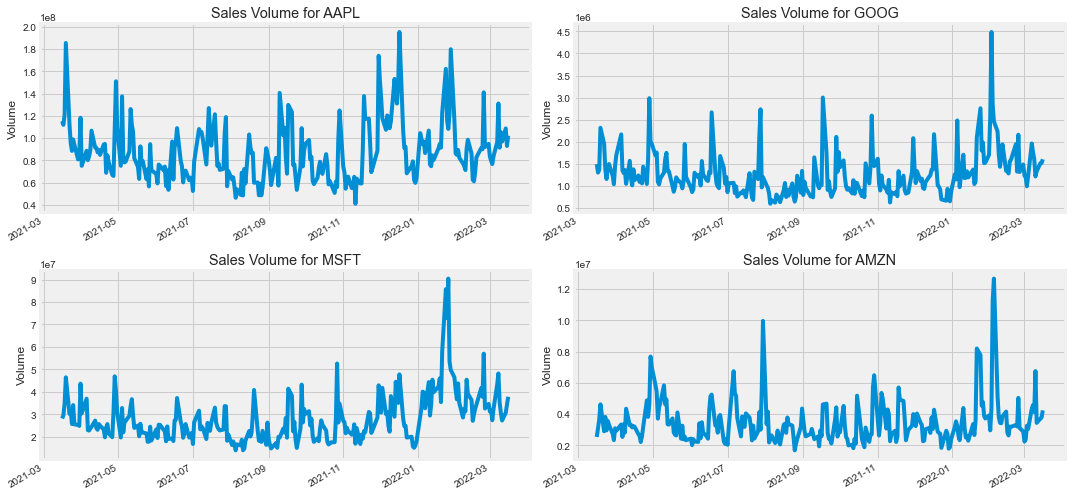

In [17]:
plt.figure(figsize=(15,7))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i-1]}")

plt.tight_layout()

In [18]:
ma_day = [10,20,50]
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

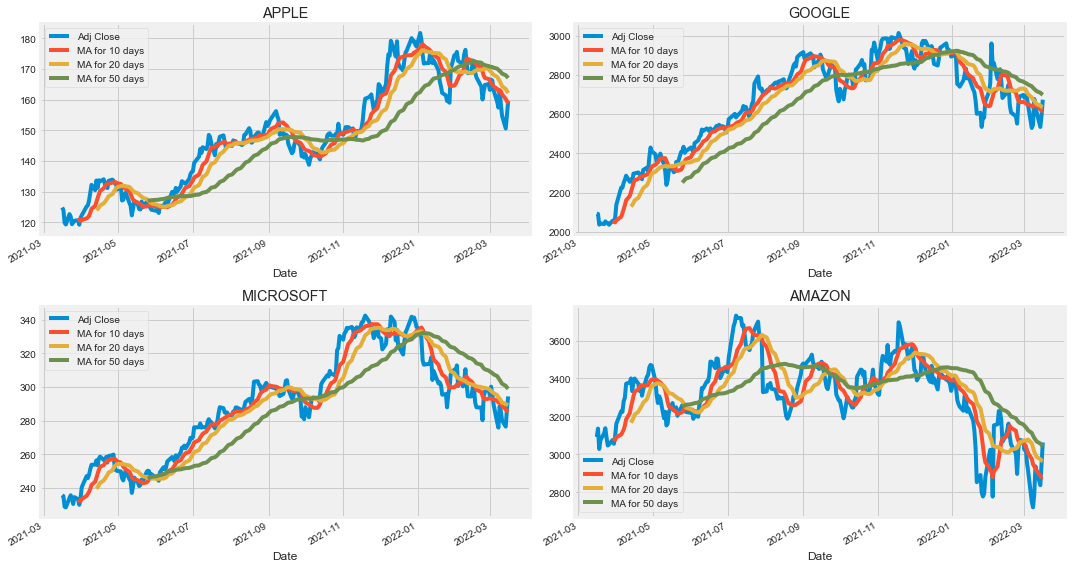

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')
GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')
MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')
AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')
fig.tight_layout()

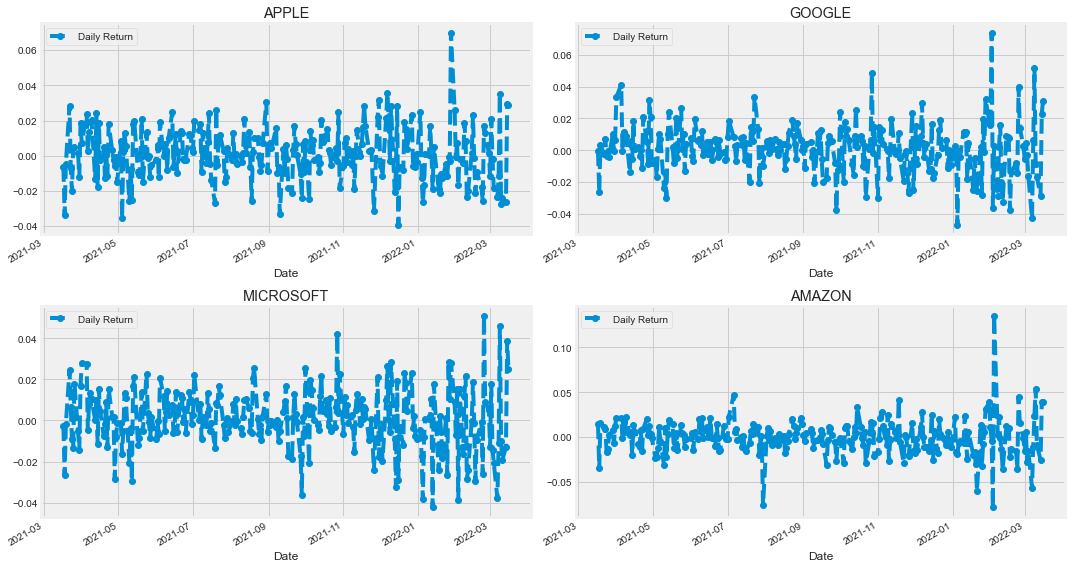

In [20]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)
AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')
GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')
MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')
AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')
fig.tight_layout()

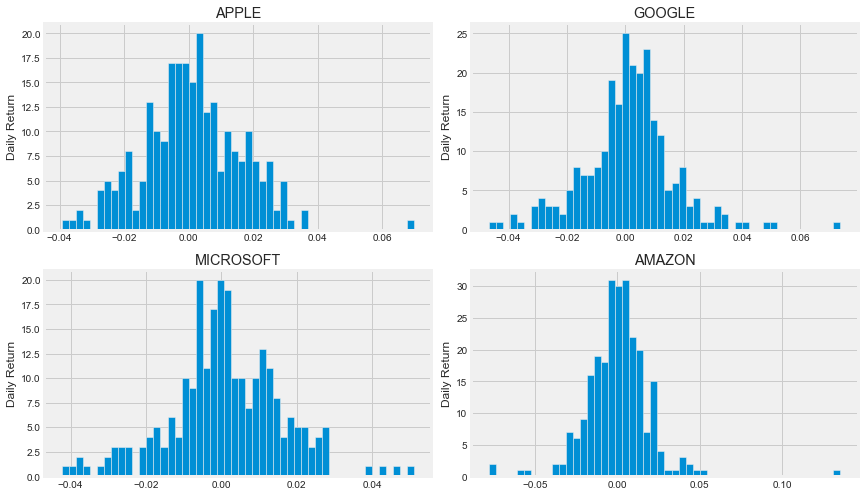

In [22]:
plt.figure(figsize=(12,7))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i-1]}')
plt.tight_layout()

In [23]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-03-16,124.828079,2092.520020,235.789398,3091.860107
2021-03-17,124.022873,2091.080078,235.124802,3135.729980
2021-03-18,119.817856,2036.219971,228.855865,3027.989990
2021-03-19,119.281052,2043.199951,228.488861,3074.959961
2021-03-22,122.660965,2038.589966,234.083298,3110.870117


In [24]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-03-16,NaN,NaN,NaN,NaN
2021-03-17,-0.006451,-0.000688,-0.002819,0.014189
2021-03-18,-0.033905,-0.026235,-0.026662,-0.034359
2021-03-19,-0.004480,0.003428,-0.001604,0.015512
2021-03-22,0.028336,-0.002256,0.024485,0.011678


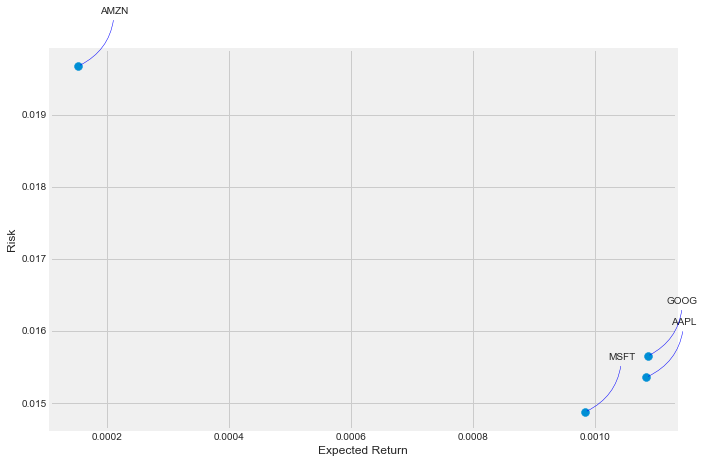

In [31]:
rets = tech_rets.dropna()
area = np.pi*20
plt.figure(figsize=(10,7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(50,50), textcoords='offset points', ha='right',
                 va='bottom', arrowprops=dict(arrowstyle='-', color='blue',
                                              connectionstyle='arc3,rad=-0.3'))

In [32]:
df=DataReader('AAPL', data_source='yahoo', start='2011-01-01', end=datetime.now())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.864284
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.078656
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.131253
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.214132
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.205873
...,...,...,...,...,...,...
2022-03-11,159.279999,154.500000,158.929993,154.729996,96836300.0,154.729996
2022-03-14,154.119995,150.100006,151.449997,150.619995,108732100.0,150.619995
2022-03-15,155.570007,150.380005,150.899994,155.089996,92964300.0,155.089996


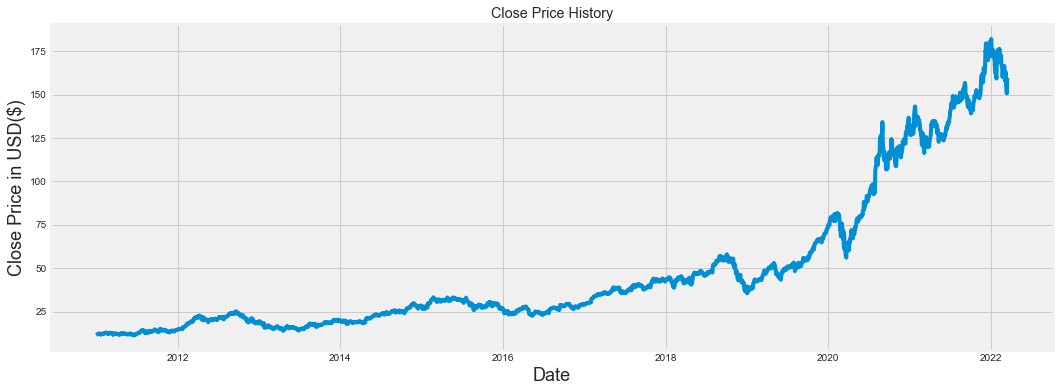

In [33]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in USD($)', fontsize=18)
plt.show()

In [34]:
data = df.filter(['Close'])
dataset=data.values
training_data_len = int(np.ceil(len(dataset) * .95))
training_data_len

2681

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00151434],
       [0.00298057],
       [0.00334033],
       ...,
       [0.84234129],
       [0.86869583],
       [0.86869583]])

In [36]:
train_data = scaled_data[0:int(training_data_len), :]
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

[array([0.00151434, 0.00298057, 0.00334033, 0.00390716, 0.00385069,
       0.00435059, 0.00567459, 0.00550517, 0.00608664, 0.00635018,
       0.00693584, 0.00529809, 0.00491952, 0.00363107, 0.00238446,
       0.00462878, 0.00545497, 0.00596742, 0.00583355, 0.0043464 ,
       0.00501991, 0.00621423, 0.00606573, 0.00588166, 0.0065217 ,
       0.007647  , 0.00834142, 0.00896054, 0.00820337, 0.00868654,
       0.00917389, 0.00932448, 0.01000009, 0.00898983, 0.00737091,
       0.0048714 , 0.00571015, 0.00576453, 0.00686891, 0.00792519,
       0.00710945, 0.0076972 , 0.00925337, 0.00934541, 0.00837489,
       0.00845855, 0.0077704 , 0.00655726, 0.00767   , 0.00799839,
       0.0062979 , 0.0030726 , 0.00404103, 0.00321065, 0.00501573,
       0.00541313, 0.00499272, 0.00620168, 0.00757588, 0.0073458 ])]
[0.007454567523412045]

[array([0.00151434, 0.00298057, 0.00334033, 0.00390716, 0.00385069,
       0.00435059, 0.00567459, 0.00550517, 0.00608664, 0.00635018,
       0.00693584, 0.00529809, 0.0

In [41]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [42]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [44]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

2621/2621 [==============================] - 96s 34ms/step - loss: 9.3596e-04


In [46]:
test_data = scaled_data[training_data_len - 60: , :]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse=np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

7.7313850281134595

C:\Users\Adrija\AppData\Local\Temp/ipykernel_11940/3620394751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


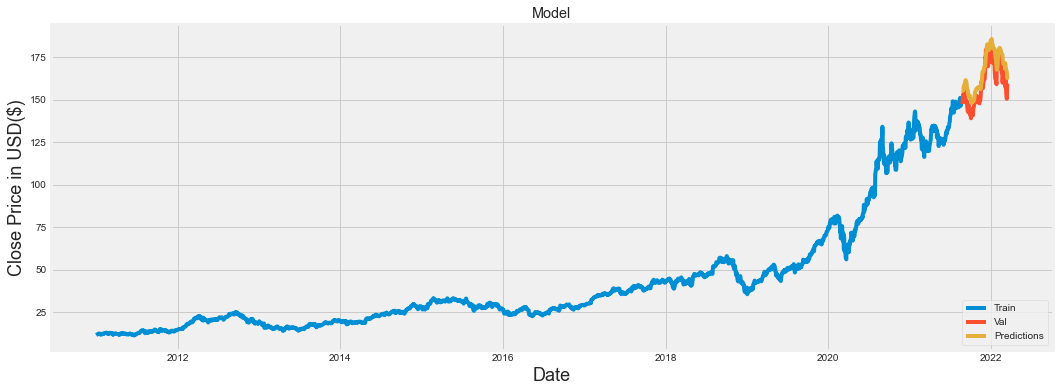

In [48]:
train = data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [49]:
valid

,Close,Predictions
Date,,
2021-08-26,147.539993,155.610687
2021-08-27,148.600006,155.444824
2021-08-30,153.119995,155.384979
2021-08-31,151.830002,156.177109
2021-09-01,152.509995,156.978241
...,...,...
2022-03-11,154.729996,167.715836
2022-03-14,150.619995,166.268768
2022-03-15,155.089996,164.090363
